#### TODOS
- Scale distplots with log-log
- Scale scatterplots with log-log, z-score
- Pairplot
- Add new feature that is (pubs with prof) * de-weight / pubs

In [1]:
import pandas as pd

In [2]:
df_all = pd.read_csv('C:\\Users\\Brend\\Downloads\\correlation.csv', index_col = 'name', encoding = "UTF-8")

In [57]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d publications" % (df_all[df_all['num_pubs'] < i].shape[0], i))

Total: 293023 authors
0 authors with less than 1 publications
6111 authors with less than 2 publications
10732 authors with less than 3 publications
14891 authors with less than 4 publications
18724 authors with less than 5 publications
22434 authors with less than 6 publications
25987 authors with less than 7 publications
29436 authors with less than 8 publications
32750 authors with less than 9 publications
35958 authors with less than 10 publications


In [58]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d coauthorships" % (df_all[df_all['TotalConns'] < i].shape[0], i))

Total: 293023 authors
0 authors with less than 1 coauthorships
21494 authors with less than 2 coauthorships
41888 authors with less than 3 coauthorships
58251 authors with less than 4 coauthorships
71756 authors with less than 5 coauthorships
83432 authors with less than 6 coauthorships
93317 authors with less than 7 coauthorships
102164 authors with less than 8 coauthorships
110017 authors with less than 9 coauthorships
117306 authors with less than 10 coauthorships


In [3]:
df_trimmed = df_all[df_all['num_pubs'] >= 5]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 2]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 204479 authors


In [4]:
for col in df_trimmed.columns:
    print("\nTop 10 %s" % str(col))
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    print(df_not_null[[col]].sort_values(col, ascending = False).head(10))
    print("\nBottom 10 %s" % str(col))
    print(df_not_null[[col]].sort_values(col, ascending = True).head(10))


Top 10 profs_per_pub
                   profs_per_pub
name                            
Rosie Levine               20.60
Asha Kamat                 17.40
Nathaniel Novod            17.00
Alville Collymore          16.80
Filip Rege                 16.60
Tsering Wangdi             16.60
Lynne Aftuck               16.60
Tracey Honan               16.60
Kerri Topham               15.00
Shiaw Pyng Yang            14.75

Bottom 10 profs_per_pub
                     profs_per_pub
name                              
高橋                             0.0
M. Everett                     0.0
M. F. Ashby                    0.0
M. F. B. Chaudhury             0.0
C. Gamble                      0.0
M. F. C. Ladd                  0.0
C. G. Wynn-Williams            0.0
C. G. Williams                 0.0
M. F. DeCamp                   0.0
M. F. Hundley                  0.0

Top 10 num_pubs
                  num_pubs
name                      
田中                 47712.0
高橋                 43610.0
小林          

                        InterCommunityFocus
name                                       
Pierre Vanhove                   935.666667
Gabriel Lichtenstein             334.000000
Jemin Lee                        322.000000
Sangmi Kim                       322.000000
Margherita Giustini              214.000000
Christopher R. Clouser           161.500000
Giulio Gianese                   161.500000
Yanmei Guo                       161.500000
Alessandro Albiero               161.500000
Pasquale Termolino               161.000000

Bottom 10 InterCommunityFocus
                      InterCommunityFocus
name                                     
A A Templeton                         0.0
Mark Baldassare                       0.0
Daniel J. McGlinn                     0.0
Daniel J. McGoldrick                  0.0
Daniel J. Nolan                       0.0
Mark A. van Zuilen                    0.0
Mark A. Yarbrough                     0.0
Daniel J. O’Shea                      0.0
Mark A. Van Dort     

                        min_PR
name                          
Robert S. Breed     236.865812
E. G. D. Murray     236.865812
N. R. Smith         236.865812
Ronald J. Williams  208.539995
Kent W. Mackay      183.533794
C. Rives            179.527591
Karsten Hokamp      179.527591
Henning Hermjakob   179.527591
Roger A. Schultz    179.527591
John S. Howland     179.527591

Bottom 10 min_PR
                   min_PR
name                     
高橋                   0.15
G. I. Barenblatt     0.15
G. I. Finch          0.15
G. I. Jones          0.15
G. I. M. Swyer       0.15
G. I. Taylor         0.15
G. I. Thompson       0.15
Seiichi Oyadomari    0.15
Seiichi Ohkuma       0.15
G. Hoyle             0.15

Top 10 avg_AR
                       avg_AR
name                         
Ulrich K. Laemmli  705.485682
Christopher Elkin  100.363912
Nicola Mulder      100.363912
James H. Gorrell   100.363912
Henning Hermjakob  100.363912
Michael Proctor    100.363912
Lorenzo Cerutti    100.363912
Guyang Huang 

In [5]:
df_trimmed.loc[['Eric S. Lander', 'Robert Langer', 'Marvin Minsky']]

,profs_per_pub,num_pubs,profs,pubs_with_profs,ratio_pubs_with_prof,InterClusterConns,InterClusterRatio,IntraClusterConns,IntraClusterRatio,TotalConns,...,median_NAR,min_NAR,avg_PR,max_PR,median_PR,min_PR,avg_AR,max_AR,median_AR,min_AR
name,,,,,,,,,,,,,,,,,,,,,
Eric S. Lander,0.743802,726.0,540.0,270.0,0.371901,3647.0,0.681937,1701.0,0.318063,5348.0,...,0.475278,0.15,10.361763,179.527591,3.731211,0.15,6.344966,100.363912,2.630555,0.15
Robert Langer,0.062390,2276.0,142.0,678.0,0.297891,196.0,0.503856,193.0,0.496144,389.0,...,0.150000,0.15,4.873018,21.636555,0.317467,0.15,2.785981,9.077218,0.264555,0.15
Marvin Minsky,0.005952,168.0,1.0,10.0,0.059524,4.0,1.000000,0.0,0.000000,4.0,...,0.150000,0.15,0.150000,0.150000,0.150000,0.15,0.150000,0.150000,0.150000,0.15


In [71]:
df_percentile = df_trimmed.copy()
for col in df_trimmed.columns:
    percentile_col = df_trimmed[pd.notna(df_trimmed[col])][col]
    df_percentile[col+'_%'] = percentile_col.rank(pct=True)
df_percentile.loc[['Eric S. Lander', 'Robert Langer', 'Marvin Minsky']][[col for col in df_percentile.columns if '%' in col]]

,profs_per_pub_%,num_pubs_%,profs_%,pubs_with_profs_%,ratio_pubs_with_prof_%,InterClusterConns_%,InterClusterRatio_%,IntraClusterConns_%,IntraClusterRatio_%,TotalConns_%,...,median_NAR_%,min_NAR_%,avg_PR_%,max_PR_%,median_PR_%,min_PR_%,avg_AR_%,max_AR_%,median_AR_%,min_AR_%
name,,,,,,,,,,,,,,,,,,,,,
Eric S. Lander,0.971836,0.967980,0.999990,0.985285,0.776791,0.999961,0.764494,0.985326,0.235511,0.999976,...,0.934468,0.308917,0.965757,0.999276,0.880090,0.068731,0.967004,0.999374,0.894979,0.068731
Robert Langer,0.558067,0.995731,0.998802,0.995968,0.698003,0.964590,0.618430,0.925371,0.381575,0.942336,...,0.227221,0.308917,0.901364,0.978105,0.258207,0.068731,0.892595,0.963370,0.301733,0.068731
Marvin Minsky,0.147839,0.758887,0.207055,0.465476,0.131967,0.355039,0.978093,0.021912,0.021912,0.125292,...,0.227221,0.308917,0.020816,0.020836,0.026174,0.068731,0.020816,0.020836,0.026174,0.068731


In [67]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[pd.notna(df_scaled[col])][[col]]
    df_scaled[col + '_Zscore'] = ss.fit_transform(scaled_col)
df_scaled.loc[['Eric S. Lander', 'Robert Langer', 'Marvin Minsky']][[col for col in df_scaled.columns if 'Zscore' in col]]

,profs_per_pub_Zscore,num_pubs_Zscore,profs_Zscore,pubs_with_profs_Zscore,ratio_pubs_with_prof_Zscore,InterClusterConns_Zscore,InterClusterRatio_Zscore,IntraClusterConns_Zscore,IntraClusterRatio_Zscore,TotalConns_Zscore,...,median_NAR_Zscore,min_NAR_Zscore,avg_PR_Zscore,max_PR_Zscore,median_PR_Zscore,min_PR_Zscore,avg_AR_Zscore,max_AR_Zscore,median_AR_Zscore,min_AR_Zscore
name,,,,,,,,,,,,,,,,,,,,,
Eric S. Lander,1.478188,1.211867,39.689010,3.220954,0.528665,27.344505,0.833109,4.548019,-0.833109,12.392283,...,0.906106,-0.306125,1.341347,15.590219,0.292407,-0.304868,1.491094,16.048227,0.425932,-0.322996
Robert Langer,-0.199133,4.532452,10.068726,8.670078,0.194157,1.219402,0.241081,0.299251,-0.241081,0.633782,...,-0.376772,-0.306125,0.443275,1.624515,-0.282528,-0.304868,0.432811,1.163362,-0.298094,-0.322996
Marvin Minsky,-0.338057,0.016457,-0.424892,-0.251528,-0.883210,-0.234095,1.890502,-0.244523,-1.890502,-0.279109,...,-0.376772,-0.306125,-0.329508,-0.276004,-0.310732,-0.304868,-0.351012,-0.292277,-0.333149,-0.322996


In [4]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[pd.notna(df_scaled[col])][[col]]
    df_scaled[col + '_Zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'Zscore' in col]]

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

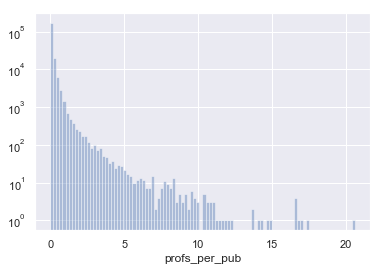

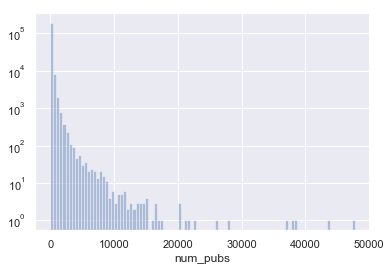

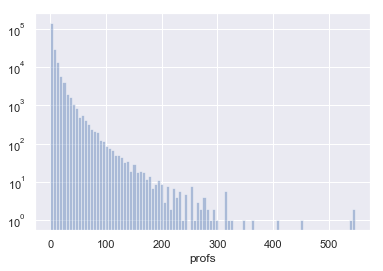

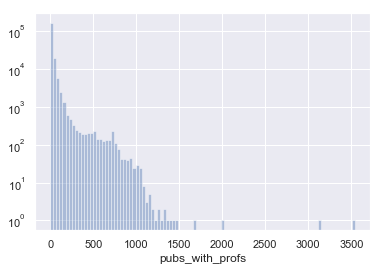

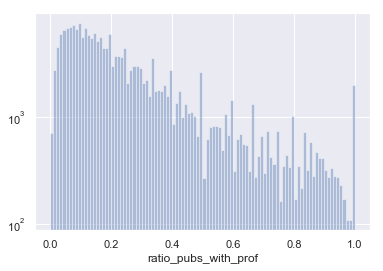

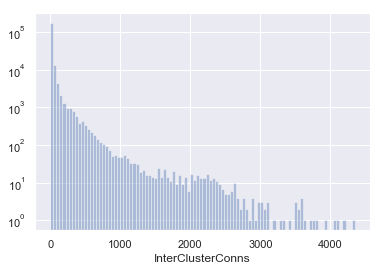

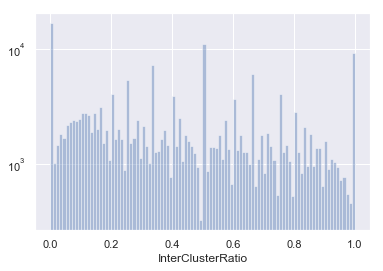

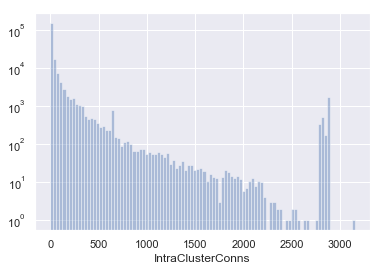

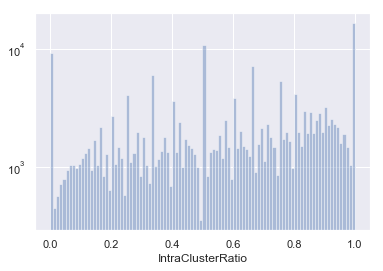

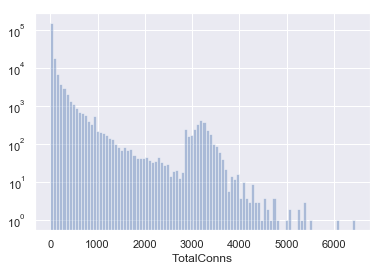

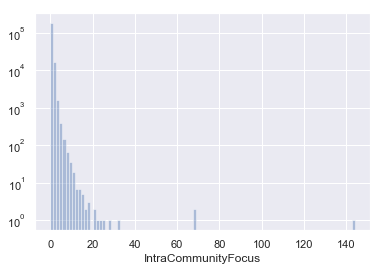

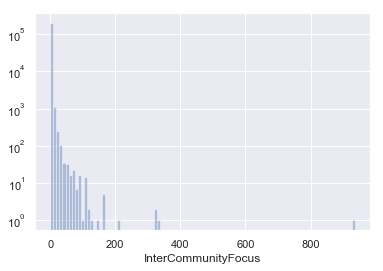

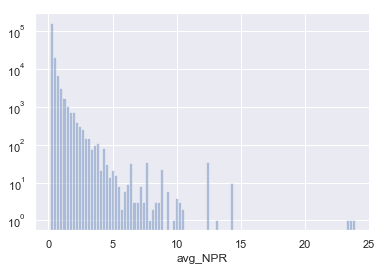

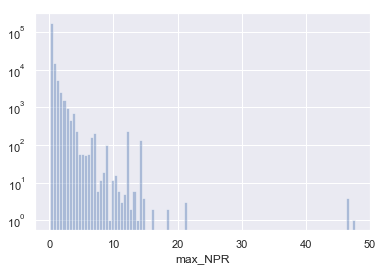

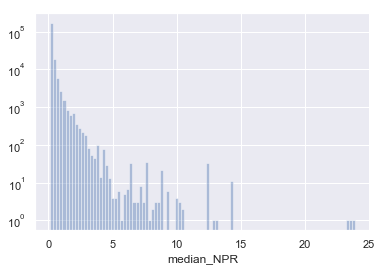

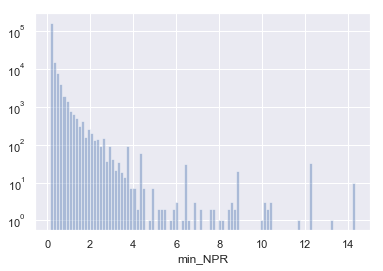

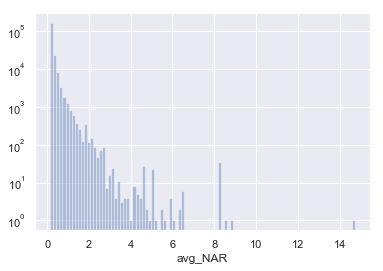

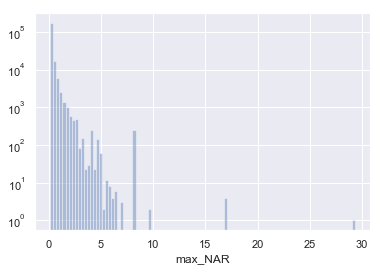

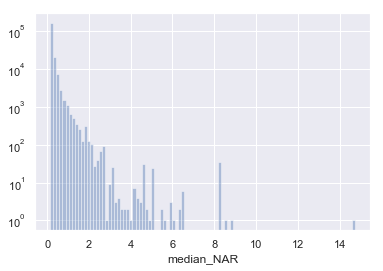

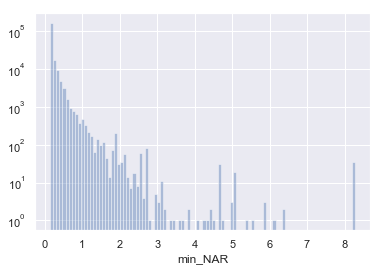

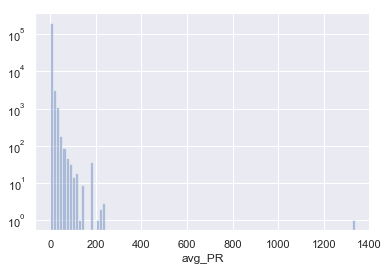

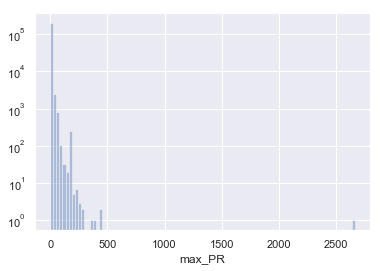

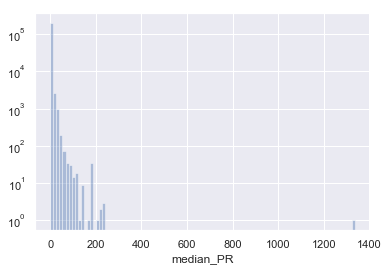

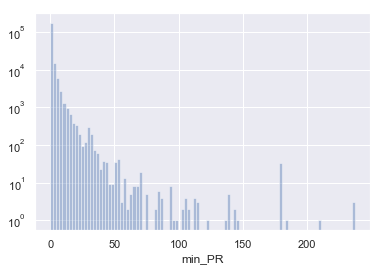

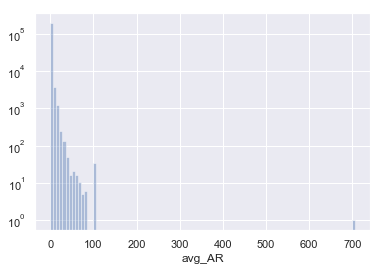

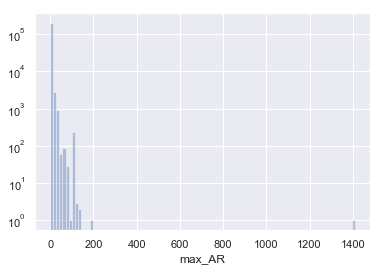

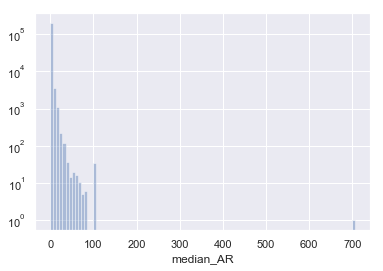

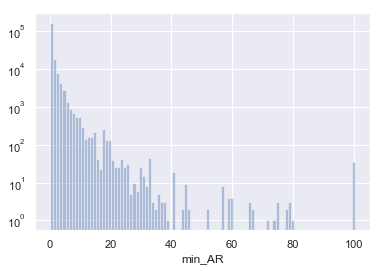

In [17]:
for col in df_trimmed.columns:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

In [18]:
print(df_zscores.columns)

Index(['profs_per_pub_Zscore', 'num_pubs_Zscore', 'profs_Zscore',
       'pubs_with_profs_Zscore', 'ratio_pubs_with_prof_Zscore',
       'InterClusterConns_Zscore', 'InterClusterRatio_Zscore',
       'IntraClusterConns_Zscore', 'IntraClusterRatio_Zscore',
       'TotalConns_Zscore', 'IntraCommunityFocus_Zscore',
       'InterCommunityFocus_Zscore', 'avg_NPR_Zscore', 'max_NPR_Zscore',
       'median_NPR_Zscore', 'min_NPR_Zscore', 'avg_NAR_Zscore',
       'max_NAR_Zscore', 'median_NAR_Zscore', 'min_NAR_Zscore',
       'avg_PR_Zscore', 'max_PR_Zscore', 'median_PR_Zscore', 'min_PR_Zscore',
       'avg_AR_Zscore', 'max_AR_Zscore', 'median_AR_Zscore', 'min_AR_Zscore'],
      dtype='object')


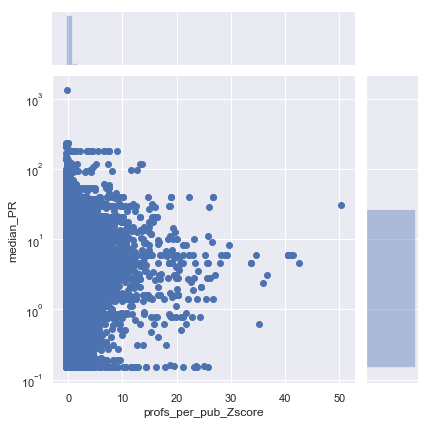

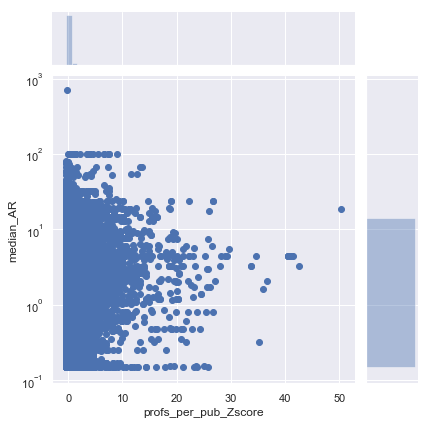

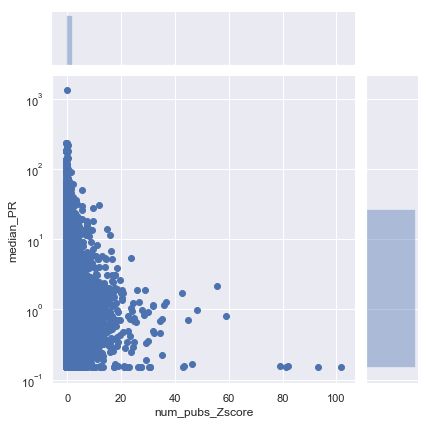

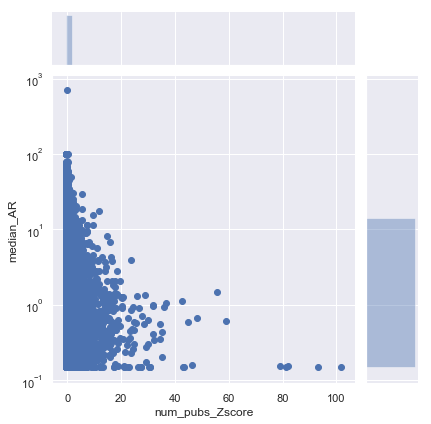

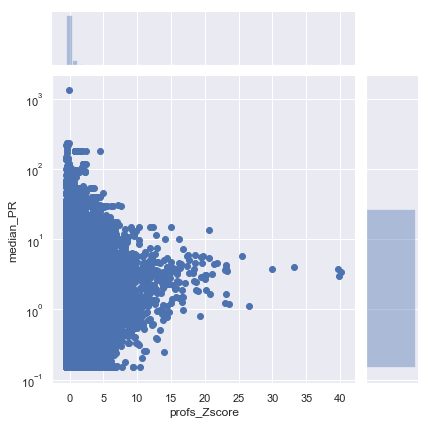

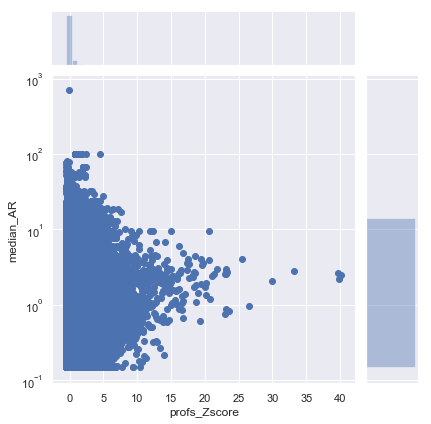

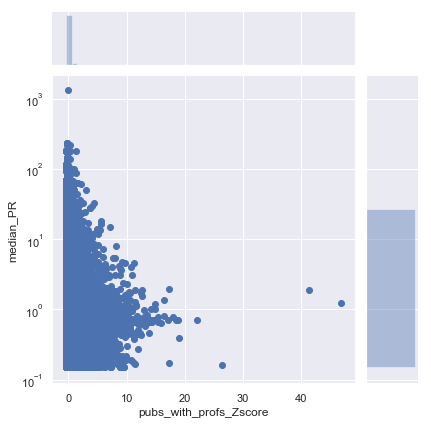

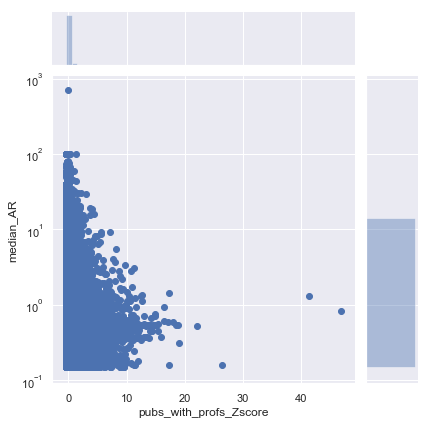

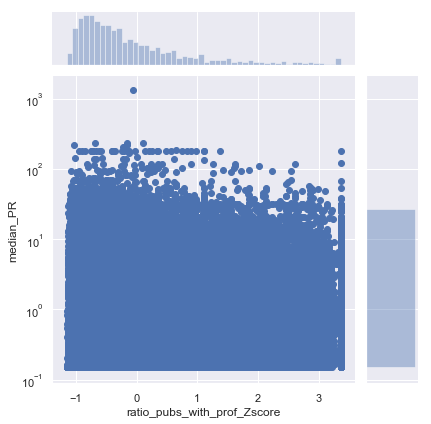

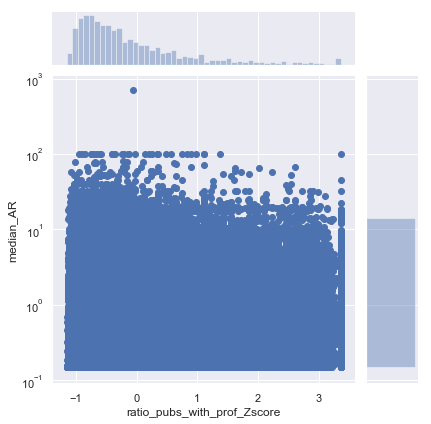

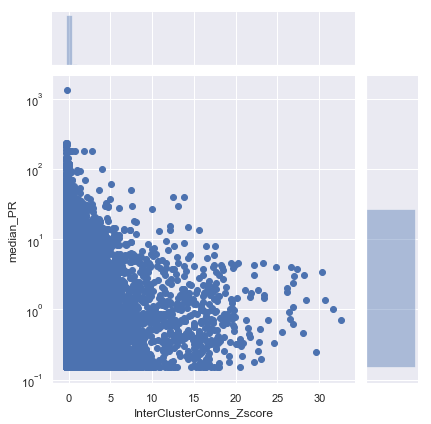

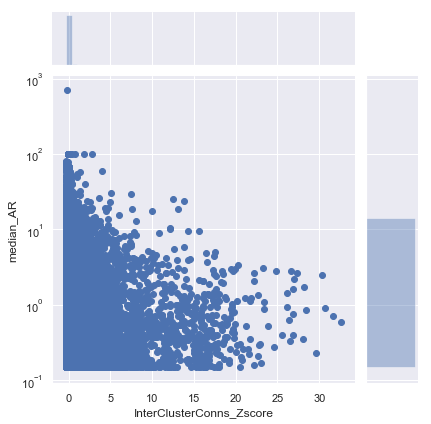

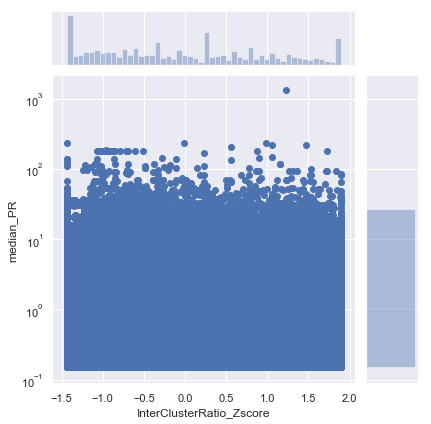

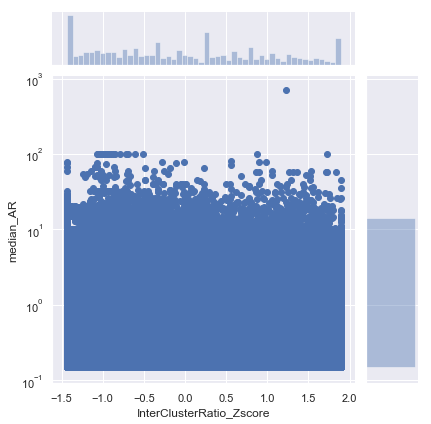

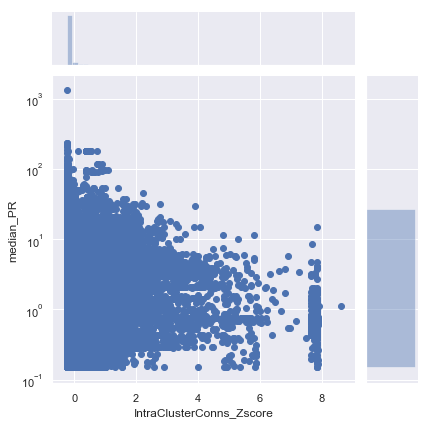

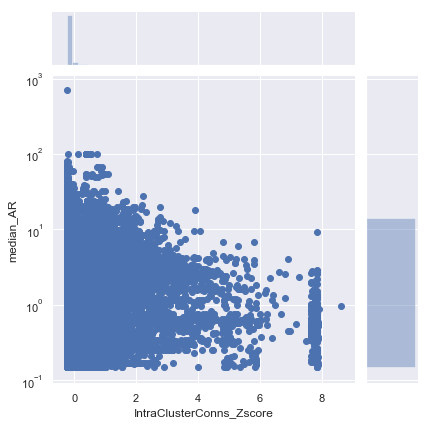

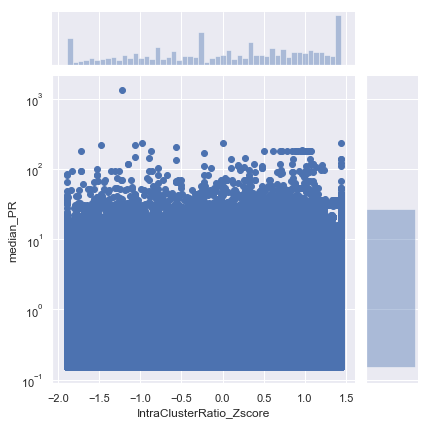

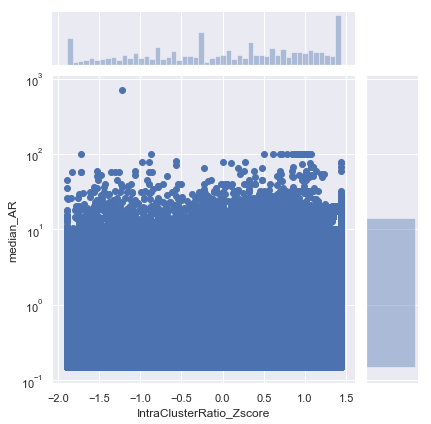

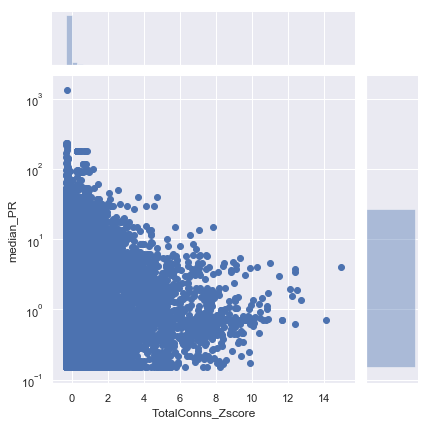

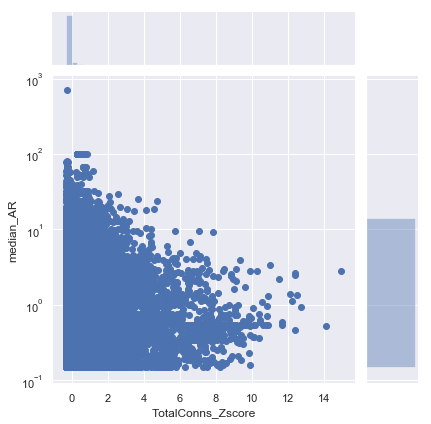

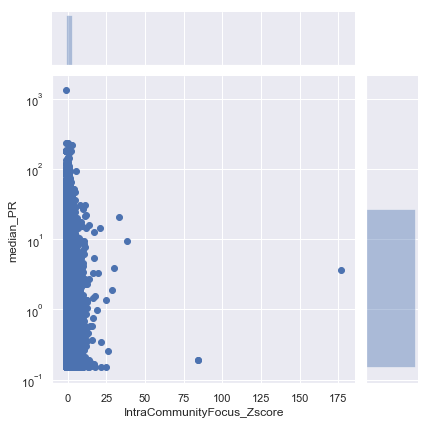

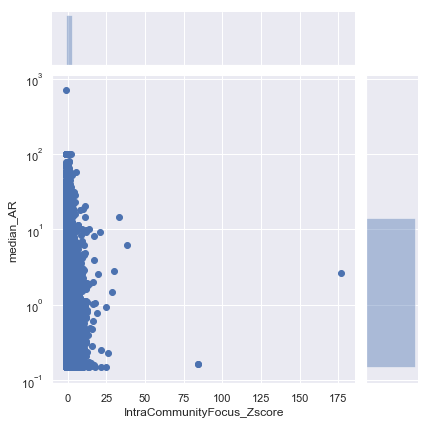

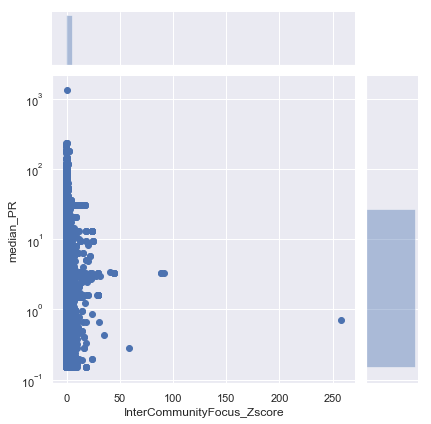

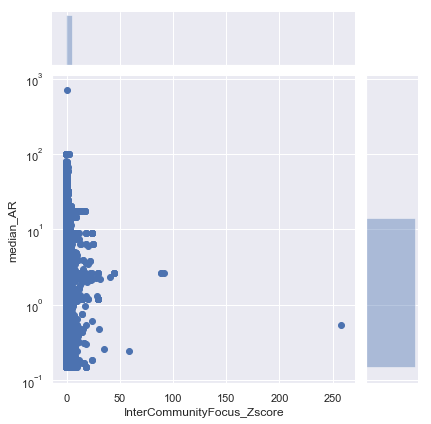

In [44]:
collab_columns = list(df_trimmed.columns)[:12]
impact_columns = ['median_PR', 'median_AR']

for x_col in collab_columns:
    for y_col in impact_columns:
        g = sns.jointplot(x = x_col+'_Zscore', y = y_col, data = pd.concat([df_zscores[[x_col+'_Zscore']], df_trimmed[[y_col]]], axis = 1), dropna = True)
#         g.ax_marg_x.set_xscale('log')
        g.ax_marg_y.set_yscale('log')
        plt.show()

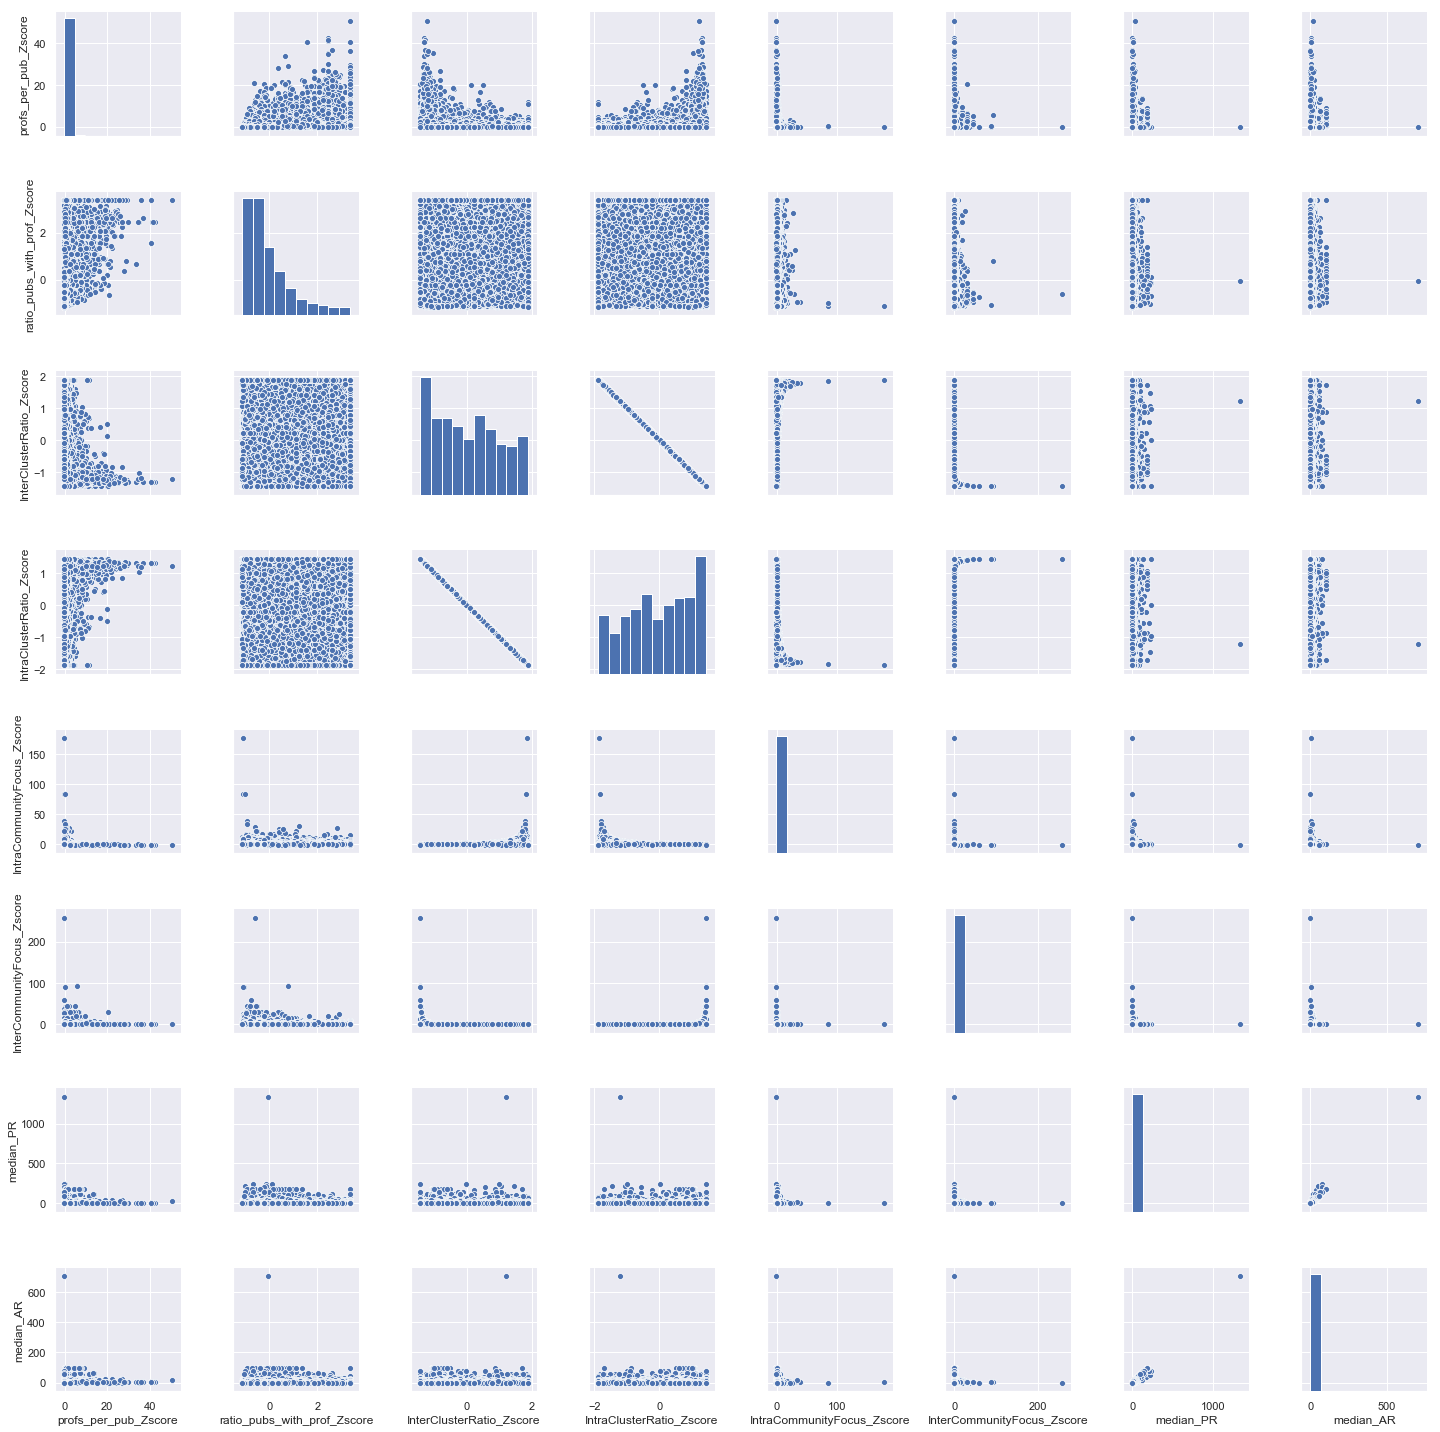

In [7]:
collab_columns = ['profs_per_pub_Zscore', 'ratio_pubs_with_prof_Zscore', 
                  'InterClusterRatio_Zscore', 'IntraClusterRatio_Zscore', 
                  'IntraCommunityFocus_Zscore','InterCommunityFocus_Zscore']
impact_columns = ['median_PR', 'median_AR']
df_pairplot = pd.concat([df_zscores[collab_columns], df_trimmed[impact_columns]], axis = 1)
g = sns.pairplot(df_pairplot)
plt.show()